In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
cell_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv')
cell_df.head(2)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


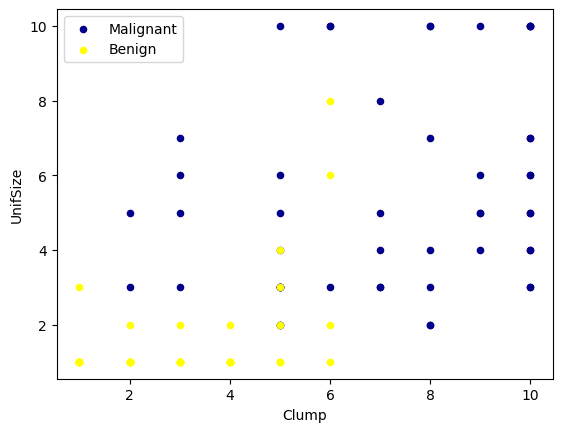

In [12]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='DarkBlue',label='Malignant')
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label='Benign',ax=ax)
plt.show()

PRE-PROCESAMIENTO

In [17]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

feature_df = cell_df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
x = np.asarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [19]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=4)

MODELADO SVM

In [28]:
# The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

# 1.Linear
# 2.Polynomial
# 3.Radial basis function (RBF)
# 4.Sigmoid

from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(x_train,y_train)
yhat = clf.predict(x_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

EVALUACION

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Matriz de confusion sin normalizacion
[[85  5]
 [ 0 47]]


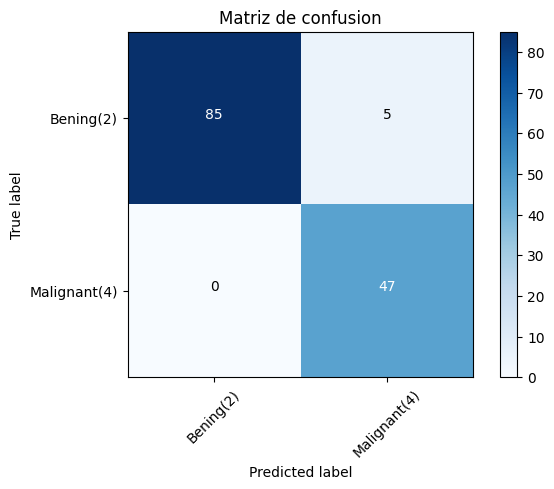

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Matriz de confusion',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Matriz de confusion normalizada')
    else:
        print('Matriz de confusion sin normalizacion')

    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test,yhat,labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test,yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Bening(2)','Malignant(4)'])



In [26]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average='weighted')

from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label=2)


0.9444444444444444